In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import cv2
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [11]:
def read_dataset(fname):
    data = pd.read_csv(fname, index_col=0)
    del data['Unnamed: 32']
    data['diagnosis'] = (data['diagnosis'] == 'M').astype('int')
    return data

In [33]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(6, 4), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    plt.show()


In [44]:
def plot_ori(X,y):
    thresholds = np.linspace(0, 0.5, 50)
    # 设置参数矩阵
    param_grid = {'min_impurity_decrease': thresholds}
 
    clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5,return_train_score = 'True')
    clf.fit(X, y)
    print("best param: {0}\nbest score: {1}".format(clf.best_params_,
                                                clf.best_score_))
    plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [45]:
#寻找最佳参数
def find_bpara(X,y):
    entropy_thresholds = np.linspace(0, 1, 50)
    gini_thresholds = np.linspace(0, 0.5, 50)
 
    # 设置参数矩阵
    param_grid = [{'criterion': ['entropy'],
                   'min_impurity_decrease': entropy_thresholds},
                  {'criterion': ['gini'],
                   'min_impurity_decrease': gini_thresholds},
                  {'max_depth': range(2, 10)},
                  {'min_samples_split': range(2, 30, 2)}]
 
    clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
    clf.fit(X, y)
    print("best param: {0}\nbest score: {1}".format(clf.best_params_,
                                                         clf.best_score_))

train dataset: (455, 30); test dataset: (114, 30)
train score: 1.0; test score: 0.9035087719298246
best param: {'min_impurity_decrease': 0.02040816326530612}
best score: 0.9297158826269213


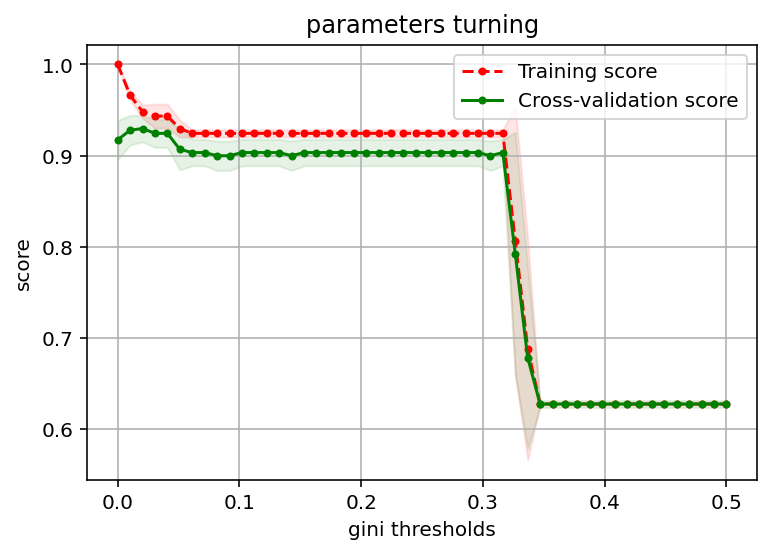

best param: {'criterion': 'entropy', 'min_impurity_decrease': 0.0}
best score: 0.9349945660611706


In [47]:
train = read_dataset('03.乳腺癌预测.csv')
#预处理
y = train['diagnosis'].values
X = train.drop(['diagnosis'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
print('train dataset: {0}; test dataset: {1}'.format(
    X_train.shape, X_test.shape))\

# 决策树算法
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))
#参数选择
plot_ori(X,y)
find_bpara(X,y)